In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [18]:
def readPickle(filename):
    import pickle

    # reload a file to a variable
    with open(filename, 'rb') as file:
        a_dict1 =pickle.load(file)

    return a_dict1

In [19]:
def writePickle(filename,dictionary):
    import pickle
    # pickle a variable to a file
    file = open(filename, 'wb')
    pickle.dump(dictionary, file)
    file.close()

In [20]:
dictFix = readPickle('./pkl/eyeMovementData.pkl')
#dictFin = readPickle('./pkl/fingerMovementData.pkl')

In [21]:
print(dictFix['101']['1']['20'].keys())

dict_keys(['systemtime', 'trialtime', 'key', 'touchx', 'touchy', 'x', 'y', 'xf', 'yf', 'fixnum', 'fixdur', 't', 'IKI', 'errorMessage'])


In [22]:
print(len(dictFix['101']['1']['22']['key']))
print(dictFix['101']['1']['22']['key'])
print(len(dictFix['101']['1']['22']['fixdur']))
print(dictFix['101']['1']['22']['fixdur'])

29
['v', 'o', 'i', 'n', 'k', 'p', ' ', '<', '<', 'o', ' ', 'a', 'u', 't', 't', 'a', 'a', ' ', 'm', 'i', 't', 'e', 'n', 'l', '<', 'k', 'ä', 'ä', 'n']
0
[]


In [35]:
#每个key之前的fixation数量的Histogram
def calculateFixNumDurPerKey(block):

    numberofFixation = {}
    durofFixation = {}

    for subject in dictFix.keys():
        for sentence in dictFix[subject][block].keys():
            if len(dictFix[subject][block][sentence]['fixnum'])==0:
                print([subject,block,sentence])
            for i in range(len(dictFix[subject][block][sentence]['key'])):
                if i!=0 and len(dictFix[subject][block][sentence]['fixnum'])!=0:
                    key = dictFix[subject][block][sentence]['key'][i]
                    if key not in [' ','<','enter']:
                        if key not in numberofFixation.keys():
                            numberofFixation[key] = []
                        if key not in durofFixation.keys():
                            durofFixation[key] = []
                            
                        fixcount = 0
                        fixdurall = 0

                        for j in range(len(dictFix[subject][block][sentence]['fixnum'][i])):
                            #按某key之前的fixation数，fixation总dur
                            fixX = dictFix[subject][block][sentence]['x'][i][j]
                            fixY = dictFix[subject][block][sentence]['y'][i][j]
                            #键盘4个角落的坐标
                            #(498,1840)(1940,1840)
                            #(498,2760)(1940,2760)
                            eyeoffset = 318
                            #tan2*40cm
                            count = 0
                            if 498-eyeoffset<fixX<1940+eyeoffset and 1840-eyeoffset<fixY<2760+eyeoffset:
                                
                                if count==0:
                                    thisfixnum = dictFix[subject][block][sentence]['fixnum'][i][j]
                                    fixcount = fixcount + 1
                                    fixdurall = fixdurall + float(dictFix[subject][block][sentence]['fixdur'][i][j])
                                else:
                                    if dictFix[subject][block][sentence]['fixnum'][i][j]!=thisfixnum:
                                        thisfixnum = dictFix[subject][block][sentence]['fixnum'][i][j]
                                        fixcount = fixcount + 1
                                        fixdurall = fixdurall + float(dictFix[subject][block][sentence]['fixdur'][i][j])
                                count = count + 1
                        if fixcount!=0:
                            #不考虑没有捕捉到fixation的情况
                            numberofFixation[key].append(fixcount)
                            durofFixation[key].append(fixdurall)
                        
    return [numberofFixation,durofFixation]


In [24]:
def drawTimeHistogram(yList,title):
    plt.hist(yList, bins='auto')  # arguments are passed to np.histogram
    plt.title(title)
    plt.savefig(title+".png")
    plt.show()

In [25]:
def rejectOutliers(dataY):
    u = np.mean(dataY)
    s = np.std(dataY)
    dataY1 = []
    rejected = []
    for i in range(len(dataY)):
        if (u - 2 * s) < dataY[i] < (u + 2 * s):
            dataY1.append(dataY[i])
        else:
            rejected.append(dataY[i])   
    if len(dataY)!=len(dataY1):
        print('outlier rejected:')
        print(rejected)
    return dataY1

['101', '1', '22']
['104', '1', '38']
['104', '1', '47']
['105', '1', '32']
['105', '1', '16']
['106', '1', '69']
['106', '1', '54']
['106', '1', '3']
['107', '1', '52']
['107', '1', '43']
['107', '1', '44']
['107', '1', '2']
['108', '1', '66']
['108', '1', '58']
['108', '1', '32']
['109', '1', '49']
['110', '1', '46']
['110', '1', '56']
['111', '1', '57']
['111', '1', '25']
['111', '1', '27']
['112', '1', '43']
['112', '1', '50']
['113', '1', '38']
['114', '1', '75']
['114', '1', '59']
['115', '1', '65']
['115', '1', '13']
['116', '1', '47']
['117', '1', '31']
['117', '1', '43']
['118', '1', '24']
['118', '1', '7']
['118', '1', '25']
['120', '1', '21']
['120', '1', '55']
['121', '1', '69']
['121', '1', '60']
['122', '1', '25']
['122', '1', '4']
['123', '1', '49']
['123', '1', '75']
['123', '1', '62']
['123', '1', '39']
['124', '1', '60']
['125', '1', '25']
['125', '1', '30']
['126', '1', '72']
['126', '1', '38']
['127', '1', '26']
['127', '1', '360']
['128', '1', '34']
['129', '1', '1

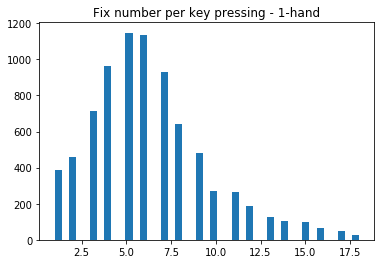

Histogram for fix duration per key pressing:
outlier rejected:
[6489.367999999999, 13845.344000000005, 6406.063, 7903.596000000003, 8181.809999999998, 5939.120999999999, 5990.696, 6326.580000000001, 7086.492000000001, 6733.622000000001, 8035.174000000003, 9515.671999999999, 11879.868, 7117.138000000001, 8186.472000000001, 9299.550000000001, 6572.170000000002, 7612.8240000000005, 14491.812000000005, 5906.372, 39942.95200000004, 6636.791000000001, 10197.173999999997, 7374.3499999999985, 7312.41, 6182.715, 8120.271999999999, 8192.484000000002, 6788.72, 10016.882, 6340.432000000001, 12129.206999999995, 7333.488, 7151.6100000000015, 5891.647999999999, 9315.964000000002, 5839.912000000001, 6739.191, 11018.355999999998, 7436.992999999999, 6988.047000000002, 7673.053999999999, 8194.481999999998, 7838.232000000001, 6838.356000000001, 6495.902, 9276.735000000002, 8986.769999999999, 6421.263999999999, 5823.733999999999, 5833.686, 6439.626, 8982.557999999997, 7055.568, 5967.116999999999, 7820.0799

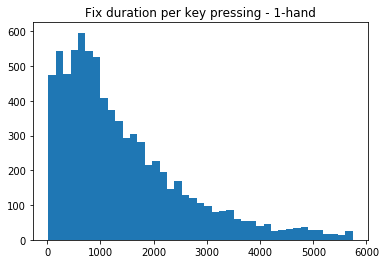

In [36]:
fInfo = calculateFixNumDurPerKey('1')
nf = fInfo[0]
df = fInfo[1]

allKeyFixNumberList = []
allKeyFixDurList = []
temp = []
for key in nf.keys():
    for item1 in nf[key]:
        temp.append(item1)
    for item2 in df[key]:
        allKeyFixDurList.append(item2)
allKeyFixNumberList = rejectOutliers(temp)
        
print('Histogram for fix number per key pressing:')
drawTimeHistogram(allKeyFixNumberList,'Fix number per key pressing - 1-hand')

print('Histogram for fix duration per key pressing:')
drawTimeHistogram(rejectOutliers(allKeyFixDurList),'Fix duration per key pressing - 1-hand')

['101', '2', '49']
['101', '2', '41']
['101', '2', '62']
['101', '2', '44']
['101', '2', '66']
['104', '2', '72']
['104', '2', '360']
['104', '2', '43']
['105', '2', '59']
['106', '2', '21']
['106', '2', '18']
['107', '2', '25']
['107', '2', '41']
['108', '2', '6']
['109', '2', '1']
['110', '2', '39']
['111', '2', '66']
['112', '2', '72']
['112', '2', '17']
['112', '2', '63']
['113', '2', '2']
['114', '2', '13']
['115', '2', '36']
['116', '2', '42']
['117', '2', '36']
['117', '2', '69']
['118', '2', '12']
['118', '2', '31']
['118', '2', '15']
['120', '2', '9']
['121', '2', '29']
['121', '2', '73']
['122', '2', '44']
['123', '2', '54']
['123', '2', '17']
['124', '2', '73']
['125', '2', '38']
['126', '2', '4']
['126', '2', '68']
['126', '2', '37']
['126', '2', '33']
['126', '2', '36']
['126', '2', '64']
['127', '2', '19']
['128', '2', '66']
['129', '2', '4']
['130', '2', '42']
['130', '2', '1']
['131', '2', '34']
['132', '2', '18']
['132', '2', '53']
['132', '2', '63']
['132', '2', '20']

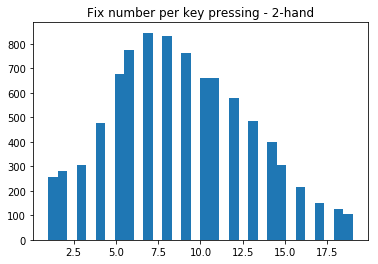

Histogram for fix duration per key pressing:
outlier rejected:
[12978.191999999997, 8170.418999999997, 8683.298999999999, 10049.055, 7531.380000000002, 8056.037000000003, 8270.613999999996, 9235.988000000001, 8234.279999999999, 7661.526, 8169.784, 8352.032999999998, 8476.655000000002, 8757.837999999998, 9671.219999999998, 8169.360999999999, 8056.018000000001, 7704.135999999999, 7903.9259999999995, 9481.090999999997, 7686.571, 8622.331999999999, 25497.052999999993, 13926.207000000002, 10782.839999999998, 11119.810000000003, 12802.222999999996, 9948.19, 11481.79, 10646.904999999999, 17907.721999999998, 14525.498000000005, 8896.419000000002, 7829.974, 18302.911000000004, 9087.518, 16126.099, 8796.054, 7504.496999999999, 8801.481000000002, 12385.015999999998, 8001.843000000001, 9151.99, 9311.419999999998, 7788.195999999998, 7621.270999999999, 8103.3719999999985, 10382.423999999999, 8319.47, 9550.412, 7454.1600000000035, 11226.511999999999, 9157.385000000002, 17038.640000000007, 9645.23, 86

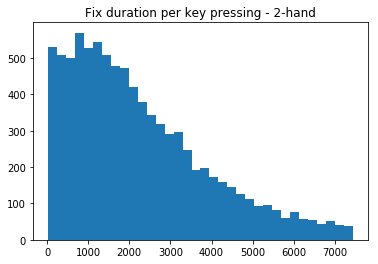

In [37]:
fInfo = calculateFixNumDurPerKey('2')
nf = fInfo[0]
df = fInfo[1]

allKeyFixNumberList = []
allKeyFixDurList = []
temp = []
for key in nf.keys():
    for item1 in nf[key]:
        temp.append(item1)
    for item2 in df[key]:
        allKeyFixDurList.append(item2)
allKeyFixNumberList = rejectOutliers(temp)
print('Histogram for fix number per key pressing:')
drawTimeHistogram(allKeyFixNumberList,'Fix number per key pressing - 2-hand')

print('Histogram for fix duration per key pressing:')
drawTimeHistogram(rejectOutliers(allKeyFixDurList),'Fix duration per key pressing - 2-hand')